<a href="https://colab.research.google.com/github/AnujaMithinti/Anomaly_Detection_with_TimeSeriesForcasting/blob/main/AnomalyDetection_TimeSeriesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update
!apt-get install -y build-essential gfortran libopenblas-dev liblapack-dev


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:13 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,051 kB]
Get:14 https://r2u.stat.illinois.edu

In [ ]:
!pip install statsmodels

In [ ]:
!pip install git+https://github.com/RJT1990/pyflux

  Cloning https://github.com/RJT1990/pyflux to /tmp/pip-req-build-8upcy7k6
  Running command git clone --filter=blob:none --quiet https://github.com/RJT1990/pyflux /tmp/pip-req-build-8upcy7k6
  Resolved https://github.com/RJT1990/pyflux to commit 297f2afc2095acd97c12e827dd500e8ea5da0c0f
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 2.5 MB/s eta 0:00:00
  Created wheel for pyflux: filename=pyflux-0.4.17-cp310-cp310-linux_x86_64.whl size=6694404 sha256=e6c8ed2bb1a06ff5ab3d0b3fc39a0edd5e85ea690473b75b82622a10872a6ba1
  Stored in directory: /tmp/pip-ephem-wheel-cache-whqs4go8/wheels/64/db/82/5636b72b8936dc8ec217a1007a19490f604f8759766e7cbe46
Successfully built pyflux


In [ ]:
import pandas as pd
!pip install pyflux

In [ ]:
import pyflux as pf
from datetime import datetime

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()
data_train_a = pd.read_csv('cpu-train-a.csv', parse_dates=[0], infer_datetime_format=True)
data_test_a = pd.read_csv('cpu-test-a.csv', parse_dates=[0], infer_datetime_format=True)
data_train_a.head()

Saving cpu-test-a.csv to cpu-test-a (2).csv
Saving cpu-train-a.csv to cpu-train-a (2).csv


,datetime,cpu
0,2017-01-27 18:42:00,1.14
1,2017-01-27 18:43:00,1.10
2,2017-01-27 18:44:00,1.09
3,2017-01-27 18:45:00,1.08
4,2017-01-27 18:46:00,1.08


Text(0.5, 1.0, 'CPU Utilization')

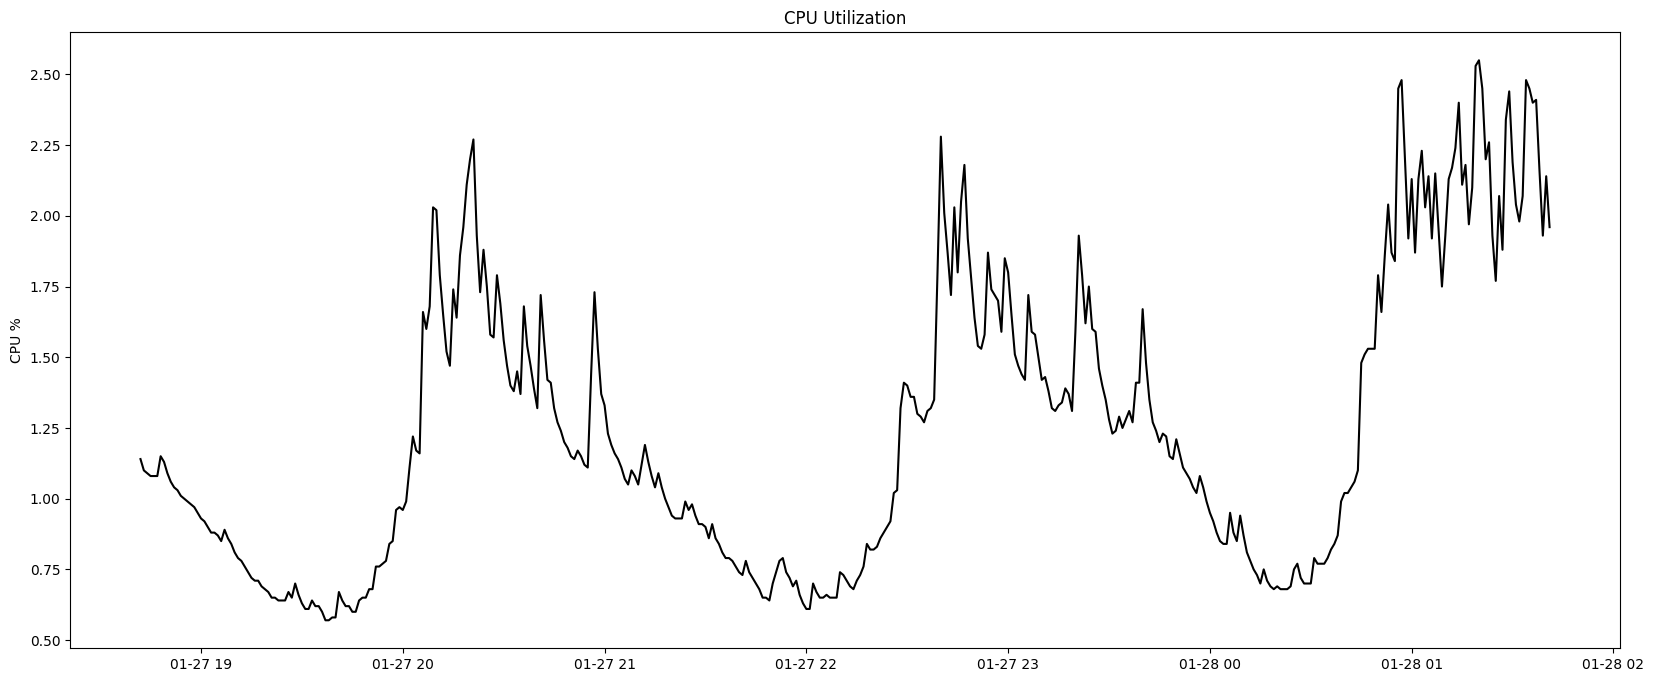

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.plot(data_train_a['datetime'], data_train_a['cpu'], color='black')
plt.ylabel('CPU %')
plt.title('CPU Utilization')

In [ ]:
!pip install numpy==1.21.5



In [ ]:
!pip uninstall pandas -y


!pip install pandas==2.0.3

Found existing installation: pandas 2.0.3
Uninstalling pandas-2.0.3:
  Successfully uninstalled pandas-2.0.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 76.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires numpy<2.0a0,>=1.23, but you have numpy 1.21.5 which is incompatible.
plotnine 0.12.4 requires numpy>=1.23.0, but you have numpy 1.21.5 which is incompatible.
statsmodels 0.14.2 requires numpy>=1.22.3, but you have numpy 1.21.5 which is incompatible.
xarray-einstats 0.7.0 requires numpy>=1.22, but you have numpy 1.21.5 which is incompatible.


In [ ]:
model_a = pf.ARIMA(data=data_train_a, ar=11, ma=11, integ=0, target='cpu')
x = model_a.fit("M-H")

Acceptance rate of Metropolis-Hastings is 0.0
Acceptance rate of Metropolis-Hastings is 0.0569
Acceptance rate of Metropolis-Hastings is 0.1115
Acceptance rate of Metropolis-Hastings is 0.162
Acceptance rate of Metropolis-Hastings is 0.17755
Acceptance rate of Metropolis-Hastings is 0.19295
Acceptance rate of Metropolis-Hastings is 0.2617

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.1085
Acceptance rate of Metropolis-Hastings is 0.2343


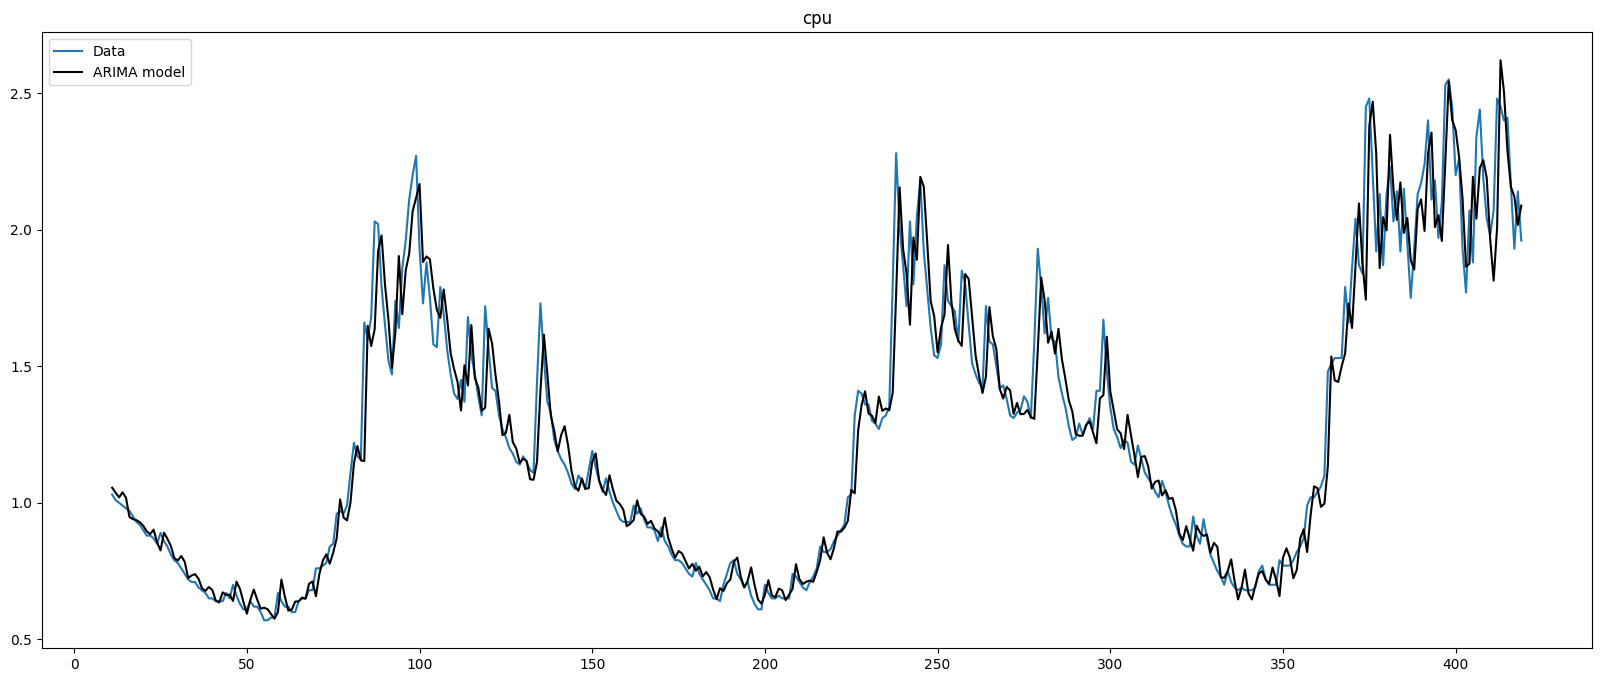

In [ ]:
model_a.plot_fit(figsize=(20,8))

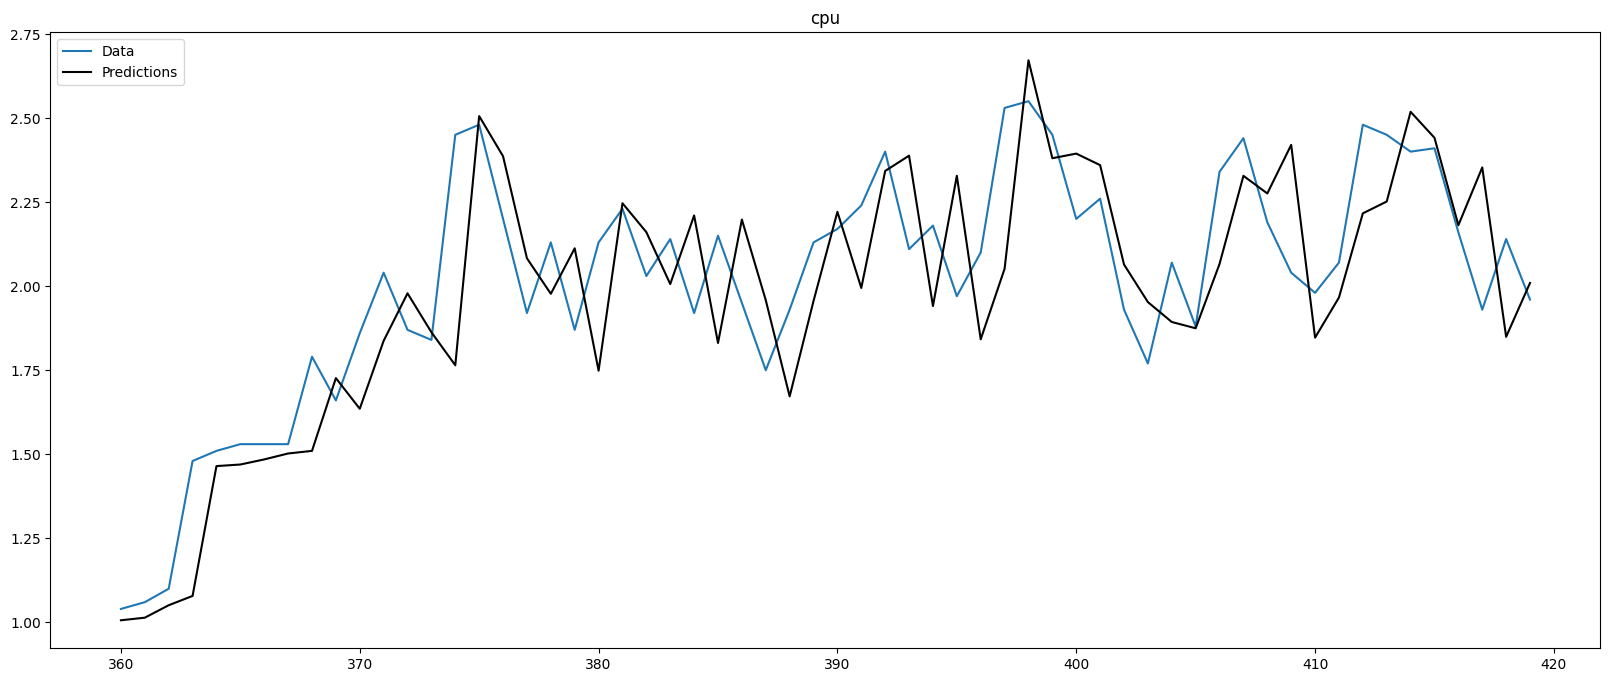

In [ ]:
#sample test to evaluate model

model_a.plot_predict_is(h=60, figsize=(20,8))

The output above shows the In-sample (training set) of our ARIMA prediction model. Now, I will run the actual prediction, by using the most recent 100 observed data points being followed by the 60 predicted points:

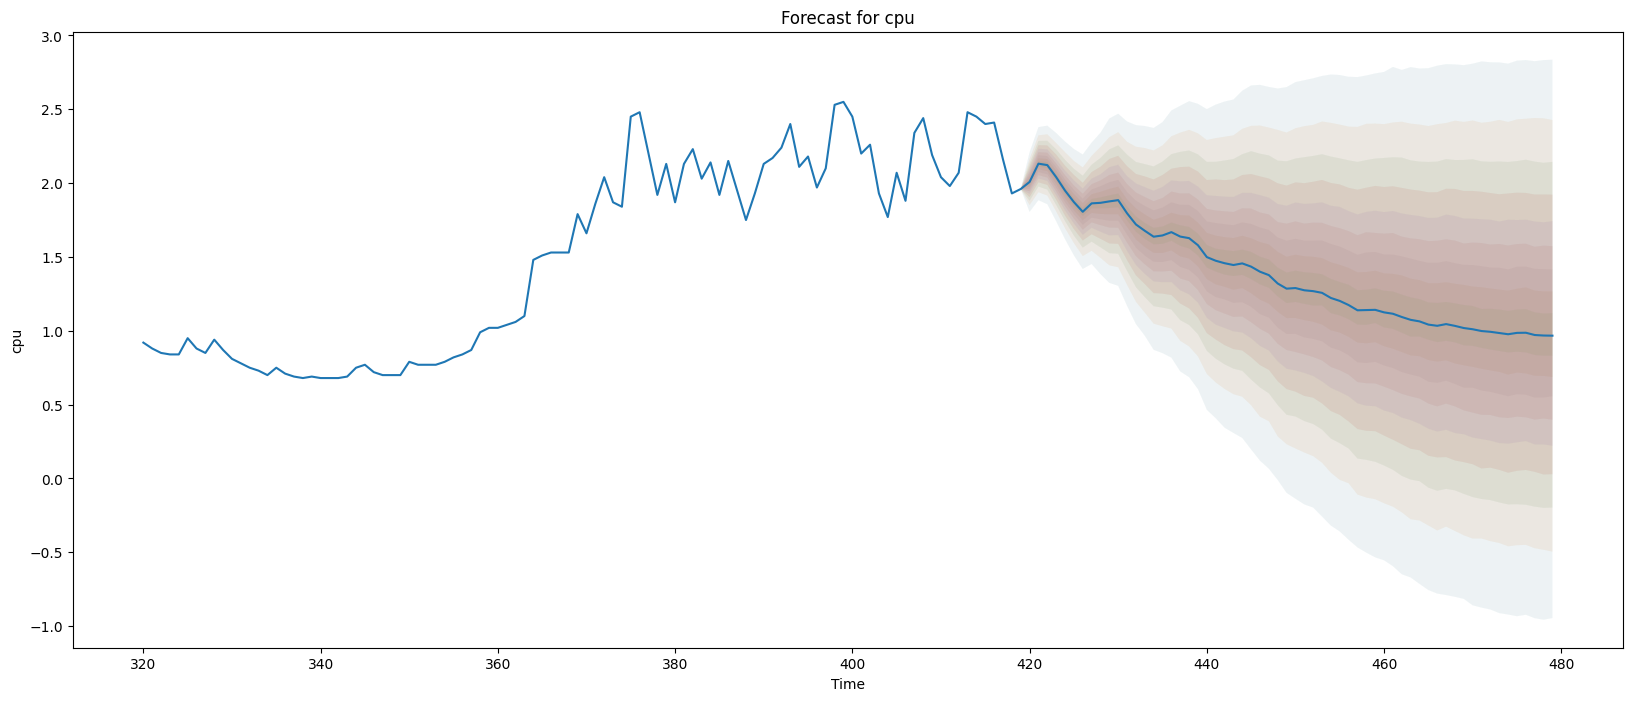

In [ ]:
model_a.plot_predict(h=60,past_values=100,figsize=(20,8))

Text(0.5, 1.0, 'CPU Utilization')

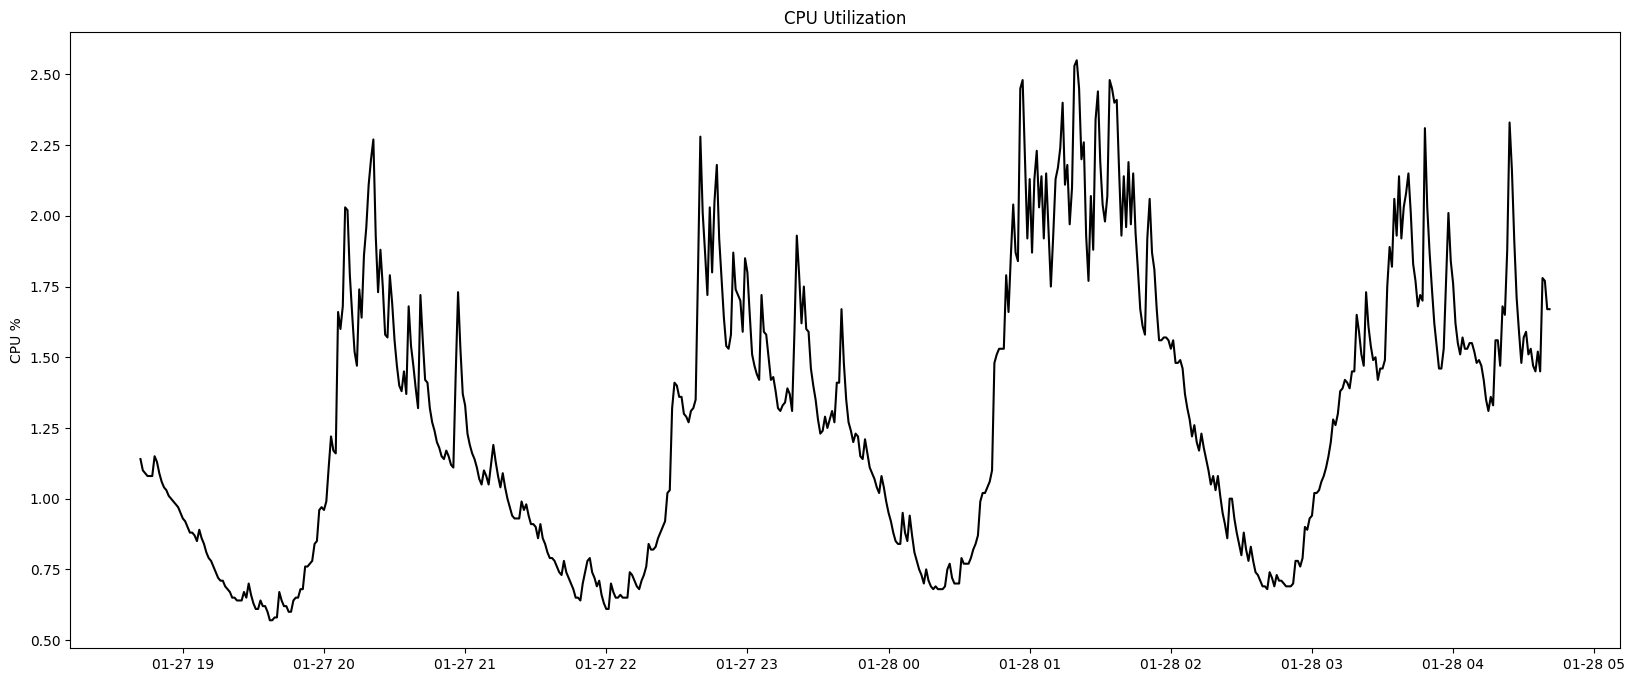

In [ ]:
import matplotlib.pyplot as plt

data_train_b = pd.read_csv('cpu-train-b.csv', parse_dates=[0], infer_datetime_format=True)
data_test_b = pd.read_csv('cpu-test-b.csv', parse_dates=[0], infer_datetime_format=True)
plt.figure(figsize=(20,8))
plt.plot(data_train_b['datetime'], data_train_b['cpu'], color='black')
plt.ylabel('CPU %')
plt.title('CPU Utilization')

Now, let’s fit this data on the model:


In [ ]:
model_b = pf.ARIMA(data=data_train_b, ar=11, ma=11, integ=0, target='cpu')
x = model_b.fit("M-H")

Acceptance rate of Metropolis-Hastings is 0.0
Acceptance rate of Metropolis-Hastings is 0.01735
Acceptance rate of Metropolis-Hastings is 0.2305
Acceptance rate of Metropolis-Hastings is 0.1951
Acceptance rate of Metropolis-Hastings is 0.17125
Acceptance rate of Metropolis-Hastings is 0.2708

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.282


In [ ]:
!pip install pandas==1.3.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 12.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.11.1 requires pandas>=1.5.0, but you have pandas 1.3.3 which is incompatible.
cudf-cu12 24.4.1 requires numpy<2.0a0,>=1.23, but you have numpy 1.21.5 which is incompatible.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.3.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.3.3 which is incompatible.
mizani 0.9.3 requires pandas>=1.3.5, but you have pandas 1.3.3 which is incompatible.
plotnine 0.12.4 requires numpy>=1.23.0, but you have numpy 1.21.5 which is incompatible.
plotnine 0.12.4 requires pandas>=1.5.0, b

In [ ]:
import pandas as pd

In [ ]:
def shift_dates_patch(self, h):
    date_index = self.index
    if isinstance(date_index, pd.DatetimeIndex):
        for i in range(h):
            date_index += pd.DateOffset((date_index[len(date_index) - 1] - date_index[len(date_index) - 2]).days)
    elif isinstance(date_index, pd.Index) and date_index.inferred_type == 'integer':
        for i in range(h):
            date_index = date_index.append(pd.Index([date_index[-1] + (date_index[-1] - date_index[-2])]))

    return date_index

# Patch the method
pf.tsm.TSM.shift_dates = shift_dates_patch

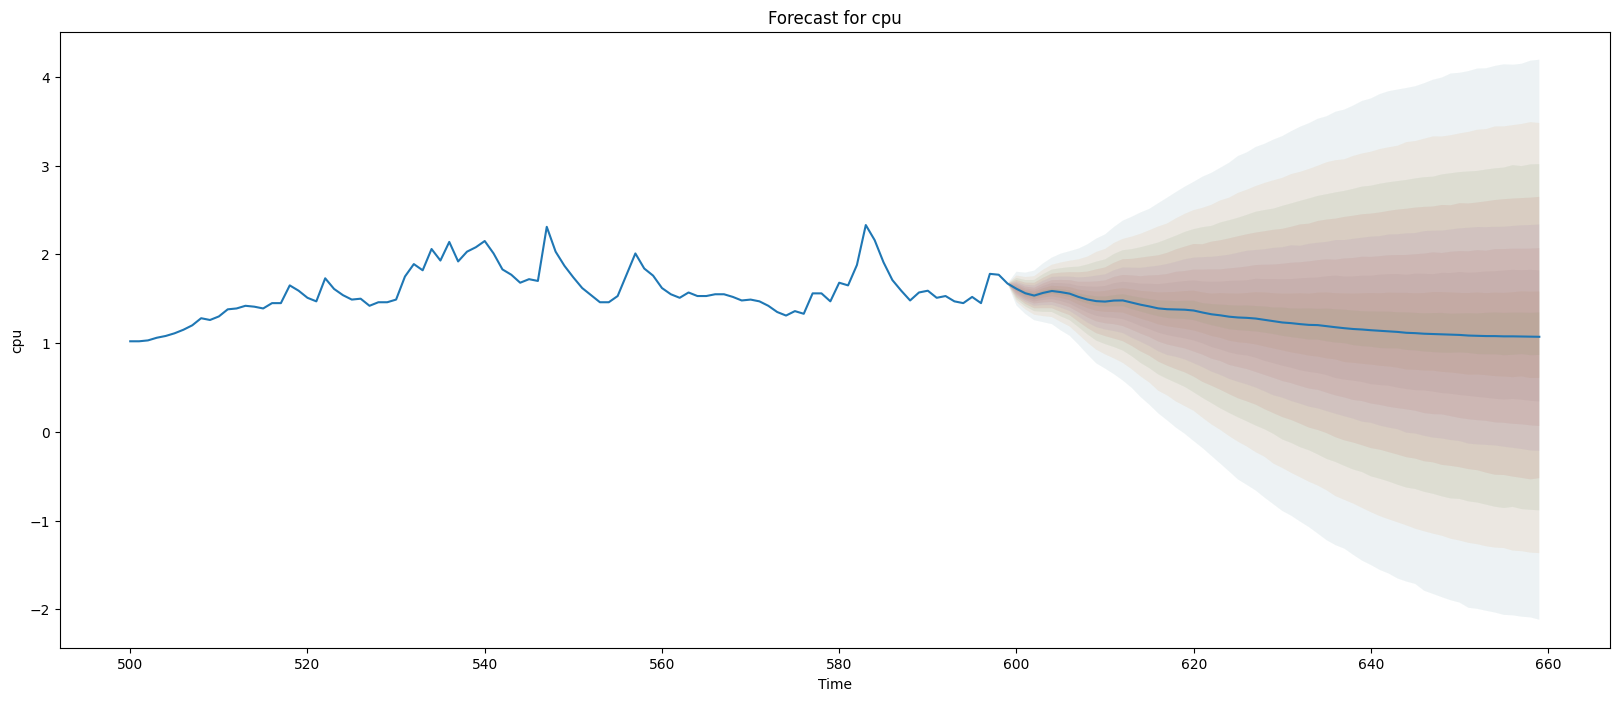

In [ ]:
model_b.plot_predict(h=60,past_values=100,figsize=(20,8))

We can visualize the anomaly that occurs a short time after the training period, as the observed values fall within the low-confidence bands, so it will raise an anomaly alert.